# Análise das questões levantadas para as disciplinas do P8

#### Importando Bibliotecas

In [1]:
import pandas as pd
from statistics import mean, median, mode, stdev, variance
from os import listdir
from math import modf

In [2]:
import sys

sys.path.insert(1, '/home/luiz/ufpb/tcc/ADA.CC/src/')

from model import gerenciador_dados
from controller import controlador_dados, gerador_graficos, gerador_relatorios, extrator_padroes

#### Abrindo Arquivos CSV

In [3]:
discentes = gerenciador_dados.retorna_discentes()

disciplinas = gerenciador_dados.retorna_componentes_com_semestre()

matriculas_realizadas = gerenciador_dados.retorna_matriculas()

matriculas_geral = gerenciador_dados.retorna_matriculas()

In [4]:
discentes.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
0,18511024,8.18,1985.1,CONCLUÍDO,1988.2
1,18511029,7.70,1985.1,CONCLUÍDO,1988.2
2,18511030,9.22,1985.1,CONCLUÍDO,1988.2
3,18511033,8.31,1985.1,CONCLUÍDO,1988.2
4,18511035,8.06,1985.1,CONCLUÍDO,1988.2


In [5]:
discentes_depois = controlador_dados.retorna_discentes_depois(discentes=discentes)

discentes_depois.head()

,matricula,cra,periodo_ingresso,descricao,periodo_conclusao
483,10611013,8.36,2006.1,CONCLUÍDO,2010.1
484,10611008,8.82,2006.1,CONCLUÍDO,2009.2
485,10611431,8.28,2006.1,CONCLUÍDO,2008.2
486,10611011,8.77,2006.1,CONCLUÍDO,2009.2
487,10611015,8.49,2006.1,CONCLUÍDO,2010.2


In [6]:
matriculas_discentes = discentes_depois['matricula'].to_list()

matriculas_discentes[:5]

[10611013, 10611008, 10611431, 10611011, 10611015]

In [7]:
disciplinas.head()

,codigo,nome,ch_total,semestre
0,1101101,COMPLEMENTOS EM FISICA GERAL I,30,NaN
1,1101107,ESTRUTURA DA MATÉRIA I,60,NaN
2,1101117,FISICA GERAL I,90,NaN
3,1101118,FISICA GERAL II,90,NaN
4,1101119,FISICA GERAL III,90,NaN


In [8]:
disciplinas.count()

codigo      291
nome        291
ch_total    291
semestre     62
dtype: int64

In [9]:
periodo_rec = 8

In [10]:
disciplinas = disciplinas[disciplinas['semestre'] == periodo_rec]
disciplinas.count()

codigo      3
nome        3
ch_total    3
semestre    3
dtype: int64

In [11]:
codigos_disciplinas = disciplinas['codigo'].to_list()

codigos_disciplinas[:5]

['1107185', '1107226', 'GDINF0100']

In [12]:
matriculas_realizadas.head()

,matricula,periodo_matricula,codigo_componente,descricao,media_final
0,10011003,2000.1,1103114,APROVADO,9.7
1,10011003,2000.1,1107137,APROVADO,10.0
2,10011003,2000.1,1103118,APROVADO,9.8
3,10011003,2000.1,1107136,APROVADO,10.0
4,10011003,2000.1,1101117,APROVADO,10.0


### Filtrando as matrículas nas quais os alunos obtiveram sucesso

In [13]:
matriculas_realizadas.count()

matricula            37767
periodo_matricula    37767
codigo_componente    37767
descricao            37767
media_final          35939
dtype: int64

In [14]:
aux = pd.DataFrame()

In [15]:
aux.empty

True

In [16]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVADO'])

In [17]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'DISPENSADO'])

In [18]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'MATRICULADO'])

In [19]:
aux = aux.append(matriculas_realizadas[matriculas_realizadas['descricao'] == 'APROVEITADO'])

In [20]:
### Tratando disciplinas com mais de um registromatriculas_realizadas = None

matriculas_realizadas = aux

matriculas_realizadas.count()

matricula            33295
periodo_matricula    33295
codigo_componente    33295
descricao            33295
media_final          33256
dtype: int64

### Tratando disciplinas com mais de um registro

Disciplinas que precisam desse tratamento:


* ESTÁGIO SUPERVISIONADO e ESTAGIO SUPERVISIONADO

In [21]:
estagio = []
estagio.append(disciplinas[disciplinas['nome'] == 'ESTÁGIO SUPERVISIONADO']['codigo'].iloc[0])
estagio.append(disciplinas[disciplinas['nome'] == 'ESTAGIO SUPERVISIONADO']['codigo'].iloc[0])
print(estagio)

['GDINF0100', '1107185']


In [22]:
estagio_aux, matriculas_realizadas = controlador_dados.mapeia_disciplina(estagio.copy(), matriculas_realizadas)
estagio_aux, matriculas_geral = controlador_dados.mapeia_disciplina(estagio.copy(), matriculas_geral)

Disciplina(s) ['1107185'] mapeadas para o código GDINF0100
Disciplina(s) ['1107185'] mapeadas para o código GDINF0100


### Disciplinas que serão analisadas

In [23]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])

codigos_disciplinas.remove('1107185')

1107185
ESTAGIO SUPERVISIONADO
1107226
TRABALHO DE CONCLUSAO DE CURSO
GDINF0100
ESTÁGIO SUPERVISIONADO


In [24]:
for disciplina in codigos_disciplinas:
    print((disciplina))
    print(disciplinas[disciplinas['codigo'] == disciplina]['nome'].iloc[0])

1107226
TRABALHO DE CONCLUSAO DE CURSO
GDINF0100
ESTÁGIO SUPERVISIONADO


### Gerando relatório

In [25]:
relatorio = gerador_relatorios.relatorio_alunos_rec_nao_rec(discentes_depois, codigos_disciplinas, matriculas_realizadas, matriculas_discentes,disciplinas)

217
217


In [26]:
relatorio

[{'nome': 'TRABALHO DE CONCLUSAO DE CURSO',
  'rec': 0.20276497695852536,
  'nao_rec': 0.7972350230414746,
  'alunos_nao_rec': [10611013,
   10611015,
   10611028,
   10611434,
   10611437,
   10611440,
   10621014,
   10621015,
   10621017,
   10621020,
   10621028,
   10621030,
   10621239,
   10621243,
   10621363,
   10621364,
   10621367,
   10711005,
   10711011,
   10711018,
   10711021,
   10711027,
   10711028,
   10711029,
   10711032,
   10711466,
   10711467,
   10711469,
   10721015,
   10721026,
   10721244,
   10811031,
   10811041,
   10811057,
   10811434,
   10811438,
   10811443,
   10821055,
   10821057,
   10821060,
   10821063,
   10821251,
   10821258,
   10821361,
   10911040,
   10911042,
   10911044,
   10911054,
   10911068,
   10911075,
   10911646,
   10911649,
   10911653,
   10921054,
   10921056,
   10921059,
   10921063,
   10921064,
   10921069,
   10921072,
   10921073,
   10921360,
   10921363,
   10921372,
   10921378,
   11011053,
   11011057,
   1

### Analisando TCC

In [27]:
codigo = codigos_disciplinas[0]

In [28]:
print(relatorio[0]['nome'])

alunos_nao_rec = relatorio[0]['alunos_nao_rec']

alunos_nao_rec

TRABALHO DE CONCLUSAO DE CURSO


[10611013,
 10611015,
 10611028,
 10611434,
 10611437,
 10611440,
 10621014,
 10621015,
 10621017,
 10621020,
 10621028,
 10621030,
 10621239,
 10621243,
 10621363,
 10621364,
 10621367,
 10711005,
 10711011,
 10711018,
 10711021,
 10711027,
 10711028,
 10711029,
 10711032,
 10711466,
 10711467,
 10711469,
 10721015,
 10721026,
 10721244,
 10811031,
 10811041,
 10811057,
 10811434,
 10811438,
 10811443,
 10821055,
 10821057,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911040,
 10911042,
 10911044,
 10911054,
 10911068,
 10911075,
 10911646,
 10911649,
 10911653,
 10921054,
 10921056,
 10921059,
 10921063,
 10921064,
 10921069,
 10921072,
 10921073,
 10921360,
 10921363,
 10921372,
 10921378,
 11011053,
 11011057,
 11011060,
 11011061,
 11011062,
 11011065,
 11011068,
 11011073,
 11011089,
 11011091,
 11011827,
 11011828,
 11011829,
 11011830,
 11011833,
 11011835,
 11011836,
 11021057,
 11021059,
 11021060,
 11021061,
 11021063,
 11021067,
 11021068,
 11021069,
 11021072,

In [29]:
controlador_dados.exibe_alunos_nao_rec(alunos_nao_rec, discentes_depois, codigo, matriculas_geral)

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
483   10611013  8.36            2006.1  CONCLUÍDO             2010.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11116   10611013             2010.1           1107226  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11217   10611015             2010.2           1107226  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
491   10611028  8.57            2006.1  CONCLUÍDO             2010.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11524   10611028             2010.1           1107226  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
488   10611434  9.02            2006.1  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
13758   10721015             2011.2           1107226  APROVADO          9.5

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
534   10721026  8.8            2007.2  CONCLUÍDO             2011.2
       matricula  periodo_matricula codigo_componente descricao  media_final
13867   10721026             2011.2           1107226  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
533   10721244  7.27            2007.2  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
13926   10721244             2013.1           1107226  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
541   10811031  8.65            2008.1  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
13976   10811031             2014.2         

       matricula  periodo_matricula codigo_componente descricao  media_final
15639   10921064             2013.2           1107226  APROVADO          9.4

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
573   10921069  7.87            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15688   10921069             2013.2           1107226  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
568   10921072  6.82            2009.2  CONCLUÍDO             2014.1
       matricula  periodo_matricula codigo_componente descricao  media_final
15798   10921072             2014.1           1107226  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
569   10921073  8.55            2009.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15853   10921073             2013.2         

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
599   11021069  9.33            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17759   11021069             2015.2           1107226  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
611   11021072  8.18            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17813   11021072             2015.2           1107226  APROVADO          8.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
601   11021432  9.01            2010.2  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
17857   11021432             2015.2           1107226  APROVADO          9.0

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
603   11021439  7.9            2010.2  CONCLUÍDO     

       matricula  periodo_matricula codigo_componente descricao  media_final
19650   11121217             2017.2           1107226  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
641   11121218  7.57            2011.2  CONCLUÍDO             2013.2
       matricula  periodo_matricula codigo_componente descricao  media_final
19702   11121218             2013.1           1107226  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
638   11121219  6.75            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19786   11121219             2016.2           1107226  APROVADO          9.7

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
633   11121220  8.23            2011.2  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
19842   11121220             2016.1         

       matricula  periodo_matricula codigo_componente descricao  media_final
22233   11311014             2018.1           1107226  APROVADO          9.3

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
674   11311018  8.49            2013.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22290   11311018             2017.1           1107226  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
677   11311469  8.82            2013.1  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
22349   11311469             2017.1           1107226  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
670   11311862  8.11            2013.1  CONCLUÍDO             2017.2
       matricula  periodo_matricula codigo_componente descricao  media_final
22408   11311862             2017.2         

In [30]:
aux = extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [31]:
aux

[0.005780346820809248,
 0.011560693641618497,
 0.011560693641618497,
 0.03468208092485549,
 0.03468208092485549,
 0.005780346820809248,
 0.03468208092485549,
 0.0,
 0.30057803468208094,
 0.1791907514450867,
 0.2023121387283237,
 0.10404624277456648,
 0.04046242774566474,
 0.017341040462427744,
 0.017341040462427744]

In [32]:
sum(aux)

1.0

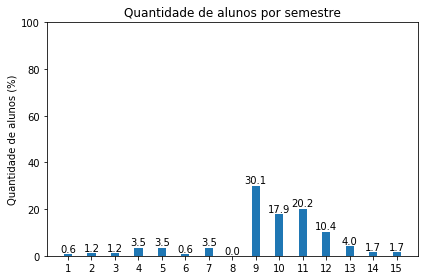

In [33]:
gerador_graficos.plot_ditribuicao_alunos(aux)

In [34]:
aux = extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [35]:
aux

{'APROVADO': 0.8323699421965318,
 'TRANCADO': 0.046242774566473986,
 'REP. FALTA': 0.06358381502890173,
 'DESISTENCIA': 0.011560693641618497,
 'REPROVADO': 0.017341040462427744,
 'MATRICULADO': 0.023121387283236993,
 'INDEFERIDO': 0.005780346820809248}

### Analisando ESTÁGIO

In [36]:
codigo = codigos_disciplinas[1]

In [37]:
print(relatorio[1]['nome'])

alunos_nao_rec = relatorio[1]['alunos_nao_rec']

alunos_nao_rec

ESTÁGIO SUPERVISIONADO


[10611013,
 10611015,
 10611028,
 10611434,
 10611437,
 10611440,
 10621014,
 10621015,
 10621017,
 10621028,
 10621030,
 10621239,
 10621243,
 10621364,
 10621367,
 10711005,
 10711018,
 10711021,
 10711027,
 10711028,
 10711029,
 10711032,
 10711466,
 10711467,
 10711469,
 10721015,
 10721026,
 10721244,
 10811031,
 10811041,
 10811057,
 10811434,
 10811438,
 10811443,
 10821055,
 10821057,
 10821060,
 10821063,
 10821251,
 10821258,
 10821361,
 10911040,
 10911042,
 10911044,
 10911054,
 10911068,
 10911075,
 10911649,
 10911653,
 10921054,
 10921056,
 10921059,
 10921063,
 10921064,
 10921069,
 10921072,
 10921073,
 10921360,
 10921363,
 10921372,
 10921378,
 11011053,
 11011057,
 11011060,
 11011061,
 11011062,
 11011065,
 11011068,
 11011073,
 11011089,
 11011091,
 11011827,
 11011828,
 11011829,
 11011830,
 11011833,
 11011835,
 11011836,
 11021057,
 11021059,
 11021060,
 11021061,
 11021063,
 11021067,
 11021068,
 11021072,
 11021439,
 11021445,
 11021452,
 11021593,
 11021635,

In [38]:
controlador_dados.exibe_alunos_nao_rec(alunos_nao_rec, discentes_depois, codigo, matriculas_geral)

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
483   10611013  8.36            2006.1  CONCLUÍDO             2010.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11112   10611013             2010.1         GDINF0100  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
487   10611015  8.49            2006.1  CONCLUÍDO             2010.2
       matricula  periodo_matricula codigo_componente descricao  media_final
11215   10611015             2010.2         GDINF0100  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
491   10611028  8.57            2006.1  CONCLUÍDO             2010.1
       matricula  periodo_matricula codigo_componente descricao  media_final
11526   10611028             2010.1         GDINF0100  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
488   10611434  9.02            2006.1  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
541   10811031  8.65            2008.1  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
13980   10811031             2015.1         GDINF0100  APROVADO          9.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
539   10811041  8.66            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14082   10811041             2012.1         GDINF0100  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
538   10811057  8.75            2008.1  CONCLUÍDO             2012.1
       matricula  periodo_matricula codigo_componente descricao  media_final
14136   10811057             2012.1         GDINF0100  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
544   10811434  8.75            2008.1  CONCLUÍDO   

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
570   10921363  6.23            2009.2  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
15988   10921363             2014.2         GDINF0100  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
576   10921372  8.01            2009.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16041   10921372             2014.2         GDINF0100  APROVADO          8.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
577   10921378  6.73            2009.2  CONCLUÍDO             2015.1
       matricula  periodo_matricula codigo_componente descricao  media_final
16161   10921378             2014.2         GDINF0100  APROVADO          9.5

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
579   11011053  8.67            2010.1  CONCLUÍDO   

       matricula  periodo_matricula codigo_componente descricao  media_final
18108   11021593             2016.2         GDINF0100  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
608   11021635  8.96            2010.2  CONCLUÍDO             2014.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18230   11021635             2014.2         GDINF0100  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
602   11021645  8.59            2010.2  CONCLUÍDO             2012.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18281   11021645             2012.1         GDINF0100  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
619   11111285  9.03            2011.1  CONCLUÍDO             2015.2
       matricula  periodo_matricula codigo_componente descricao  media_final
18334   11111285             2015.2         

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
640   11121914  6.04            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20369   11121914             2016.2         GDINF0100  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
636   11128089  5.35            2011.2  CONCLUÍDO             2017.1
       matricula  periodo_matricula codigo_componente   descricao  media_final
20444   11128089             2015.2         GDINF0100  REP. FALTA          0.0
20462   11128089             2016.2         GDINF0100    APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
662   11211054  7.39            2012.1  CONCLUÍDO             2013.1
       matricula  periodo_matricula codigo_componente descricao  media_final
20515   11211054             2013.1         GDINF0100  APROVADO          9.0

     matricula  cra  periodo_ingresso 

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
687   11403755  7.46            2014.1  CONCLUÍDO             2016.2
       matricula  periodo_matricula codigo_componente descricao  media_final
23007   11403755             2016.2         GDINF0100  APROVADO          9.5

     matricula  cra  periodo_ingresso  descricao  periodo_conclusao
683   11403784  7.3            2014.1  CONCLUÍDO             2016.1
       matricula  periodo_matricula codigo_componente descricao  media_final
23126   11403784             2015.1         GDINF0100  APROVADO          7.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
688   11408104  8.22            2014.1  CONCLUÍDO             2018.1
       matricula  periodo_matricula codigo_componente descricao  media_final
23195   11408104             2018.1         GDINF0100  APROVADO         10.0

     matricula   cra  periodo_ingresso  descricao  periodo_conclusao
686   11409511  8.82            2014.1  CONCLUÍDO     

In [39]:
aux = extrator_padroes.porcentagem_por_periodo(alunos_nao_rec, discentes_depois, matriculas_realizadas, codigo,
                            periodo_rec=periodo_rec)

In [40]:
aux

[0.005780346820809248,
 0.011560693641618497,
 0.023121387283236993,
 0.028901734104046242,
 0.023121387283236993,
 0.011560693641618497,
 0.03468208092485549,
 0.0,
 0.3179190751445087,
 0.21965317919075145,
 0.20809248554913296,
 0.05202312138728324,
 0.05202312138728324,
 0.005780346820809248,
 0.005780346820809248]

In [41]:
sum(aux)

1.0

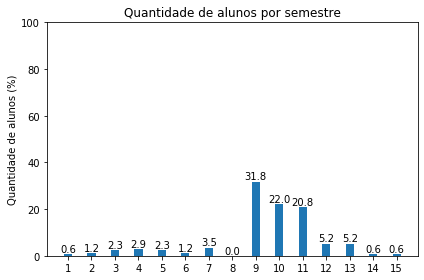

In [42]:
gerador_graficos.plot_ditribuicao_alunos(aux)

In [43]:
aux = extrator_padroes.porcentagem_por_situacao(alunos_nao_rec, discentes_depois, matriculas_geral, codigo,
                            periodo_rec=periodo_rec)

In [44]:
aux

{'APROVADO': 0.8901734104046243,
 'REP. FALTA': 0.011560693641618497,
 'REPROVADO': 0.005780346820809248,
 'TRANCADO': 0.005780346820809248,
 'EXCLUIDA': 0.005780346820809248,
 'DISPENSADO': 0.046242774566473986,
 'INDEFERIDO': 0.011560693641618497,
 'MATRICULADO': 0.017341040462427744,
 'APROVEITADO': 0.005780346820809248}